<a href="https://colab.research.google.com/github/AaronMenez/Ds_Aaron/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fear_greed_path = '/content/drive/MyDrive/dS_Aaron/fear_greed_index.csv'
historical_data_path = '/content/drive/MyDrive/dS_Aaron/historical_data.csv'

In [4]:
fear_greed_df = pd.read_csv(fear_greed_path)
historical_df = pd.read_csv(historical_data_path)

In [5]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
historical_df['trade_datetime'] = pd.to_datetime(historical_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
historical_df['date'] = historical_df['trade_datetime'].dt.date
historical_df['date'] = pd.to_datetime(historical_df['date'])


In [6]:
merged_df = pd.merge(historical_df, fear_greed_df[['date', 'classification']], on='date', how='left')

In [7]:
summary_df = merged_df.groupby('classification').agg(
    total_trades=('Account', 'count'),
    avg_closed_pnl=('Closed PnL', 'mean'),
    total_closed_pnl=('Closed PnL', 'sum'),
    avg_leverage=('Crossed', 'mean'),  # Replace with actual leverage if exists
    total_volume=('Size USD', 'sum'),
    avg_trade_size=('Size USD', 'mean'),
).reset_index()

summary_df.sort_values(by='total_trades', ascending=False)

,classification,total_trades,avg_closed_pnl,total_closed_pnl,avg_leverage,total_volume,avg_trade_size
2,Fear,61837,54.290400,3.357155e+06,0.600886,4.833248e+08,7816.109931
3,Greed,50303,42.743559,2.150129e+06,0.614476,2.885825e+08,5736.884375
1,Extreme Greed,39992,67.892861,2.715171e+06,0.622224,1.244652e+08,3112.251565
4,Neutral,37686,34.307718,1.292921e+06,0.618771,1.802421e+08,4782.732661
0,Extreme Fear,21400,34.537862,7.391102e+05,0.566963,1.144843e+08,5349.731843


In [8]:
sns.set(style='whitegrid')

/tmp/ipython-input-9-406636119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x='classification', y='total_closed_pnl', palette='coolwarm')


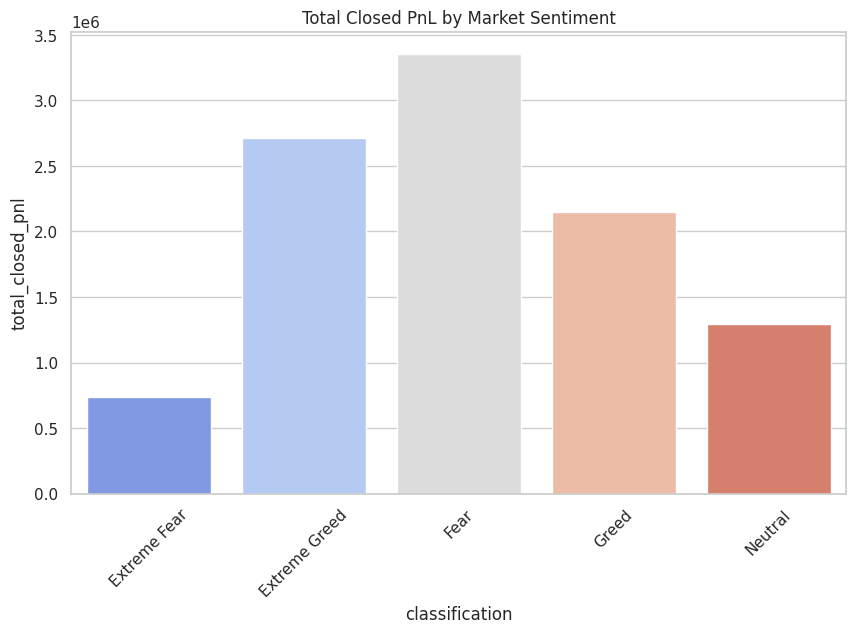

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='classification', y='total_closed_pnl', palette='coolwarm')
plt.title('Total Closed PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-10-85651927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x='classification', y='avg_leverage', palette='viridis')


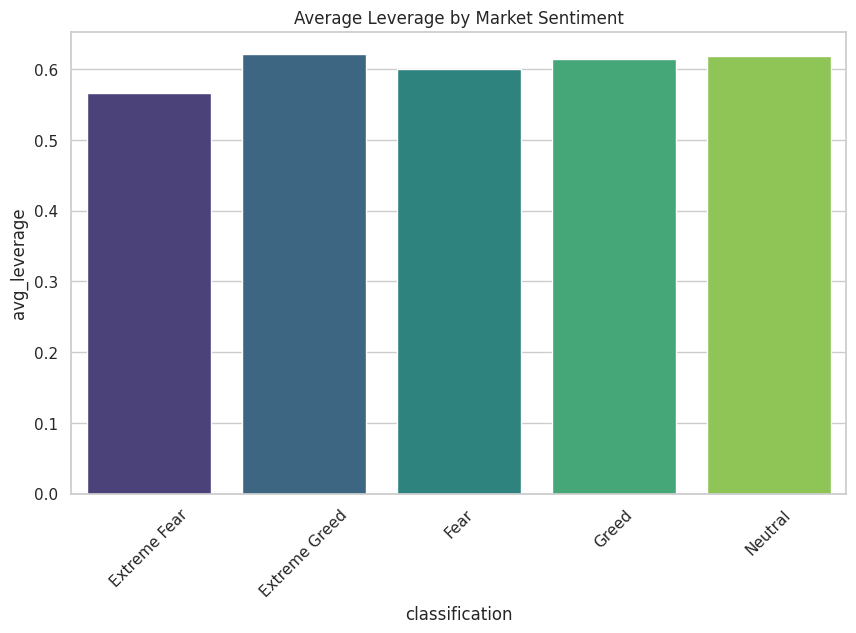

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='classification', y='avg_leverage', palette='viridis')
plt.title('Average Leverage by Market Sentiment')
plt.xticks(rotation=45)
plt.show()

In [11]:
summary_df.to_csv('/content/drive/MyDrive/sentiment_summary.csv', index=False)